In [15]:
import matplotlib.pyplot as plt
import numpy as np
import torch

import kornia.io.io as kio
import kornia.augmentation as kaug
import kornia.enhance as kenh

In [16]:
# Converts C x H x W to H x W x C
def to_hwc(img: torch.Tensor):
    return img.permute(1, 2, 0).int()

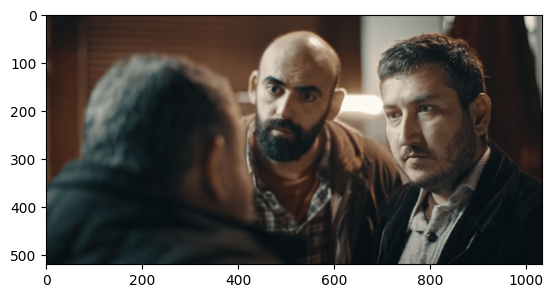

In [17]:
# Load image (C x H x W): https://kornia.readthedocs.io/en/latest/io.html
img = kio.load_image("gibi.png", kio.ImageLoadType.UNCHANGED)

plt.imshow(to_hwc(img))
plt.show()

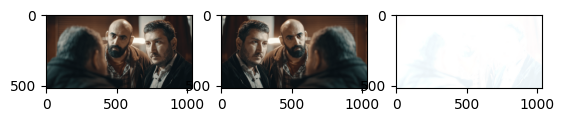

In [40]:
# Flip the image: https://kornia.readthedocs.io/en/latest/augmentation.module.html?highlight=flip#kornia.augmentation.RandomHorizontalFlip
flip = kaug.RandomHorizontalFlip(p=1, keepdim=True)
flipped_img = torch.as_tensor(flip(img.float()))
brightness_adjusted_img = kenh.adjust_brightness(img.float()/255, .9)
fig, axes = plt.subplots(1, 3)
fig.set_dpi(100) # To scale the figure (enlarge)
axes[0].imshow(to_hwc(img))
axes[1].imshow(to_hwc(flipped_img))
axes[2].imshow(to_hwc(brightness_adjusted_img * 255))
plt.show()